In [1]:
from DataLoader import get_data_loaders

train_data, val_data, test_data, data_loader = get_data_loaders(
        cases=["AS", "exp", "pi"],
        doping=6.0,
        max_shots=1000,
        train_split=0.8)
 


AS
mean stagg mag taken:  13.844
mean stagg mag:  13.844
1000  snapshots
exp
mean stagg mag taken:  12.834
mean stagg mag:  12.834
1000  snapshots
pi
mean stagg mag taken:  10.718
mean stagg mag:  10.718
1000  snapshots


2025-01-22 10:13:22.612105: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-01-22 10:13:22.612135: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-01-22 10:13:22.612144: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-01-22 10:13:22.612158: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-01-22 10:13:22.612167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
len(val_data)

10

In [2]:
# Convert the first batch of the training dataset to NumPy arrays
for sample, label in train_data.take(1).as_numpy_iterator():
    print("Sample:", sample[0])
    print("Label:", label[0])
    break

Sample: [[[ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [-1.]
  [ 1.]
  [ 1.]
  [ 0.]
  [ 0.]
  [ 0.]]

 [[ 0.]
  [-1.]
  [ 1.]
  [-1.]
  [ 1.]
  [ 1.]
  [-1.]
  [ 1.]
  [-1.]
  [ 0.]]

 [[ 0.]
  [ 1.]
  [-1.]
  [ 1.]
  [-1.]
  [-1.]
  [ 1.]
  [-1.]
  [ 1.]
  [ 0.]]

 [[-1.]
  [-1.]
  [-1.]
  [ 1.]
  [-1.]
  [ 1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]]

 [[-1.]
  [ 1.]
  [-1.]
  [-1.]
  [-1.]
  [-1.]
  [ 1.]
  [-1.]
  [ 1.]
  [ 1.]]

 [[ 1.]
  [-1.]
  [ 1.]
  [ 1.]
  [-1.]
  [-1.]
  [ 1.]
  [-1.]
  [ 1.]
  [ 1.]]

 [[-1.]
  [-1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [-1.]
  [ 1.]
  [ 1.]
  [-1.]
  [-1.]]

 [[ 0.]
  [-1.]
  [ 1.]
  [ 1.]
  [-1.]
  [ 1.]
  [-1.]
  [ 1.]
  [-1.]
  [ 0.]]

 [[ 0.]
  [ 1.]
  [-1.]
  [-1.]
  [-1.]
  [ 1.]
  [-1.]
  [-1.]
  [-1.]
  [ 0.]]

 [[ 0.]
  [ 0.]
  [ 0.]
  [ 1.]
  [ 1.]
  [-1.]
  [-1.]
  [ 0.]
  [ 0.]
  [ 0.]]]
Label: [1. 0. 0.]


In [3]:
import tensorflow as tf 

# create a simple cnn model with 2 conv layers, 2 max pooling layers, and 2 dense layers  with a categorical output
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])




# compile the model
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    

In [5]:
# early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)

# fit the model
model.fit(train_data, validation_data=val_data, epochs=30)

Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5466 - loss: 0.9426 - val_accuracy: 0.3633 - val_loss: 1.1984
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5736 - loss: 0.9056 - val_accuracy: 0.3833 - val_loss: 1.1917
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6013 - loss: 0.8644 - val_accuracy: 0.3500 - val_loss: 1.2633
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6265 - loss: 0.8350 - val_accuracy: 0.3667 - val_loss: 1.2706
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6608 - loss: 0.7860 - val_accuracy: 0.3633 - val_loss: 1.3427
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6888 - loss: 0.7429 - val_accuracy: 0.3567 - val_loss: 1.4139
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7118 - loss: 0.6936 - val_accuracy: 0.3633 - val_loss: 1.4860
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7362 - loss: 0.6388 - val_accuracy: 0.3433 - va

In [ ]:
model.history.history

In [14]:
# Evaluate the model on the test data
model.evaluate(test_data)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4063 - loss: 1.1813


[1.164759874343872, 0.4000000059604645]

In [20]:
model.history.history

{}

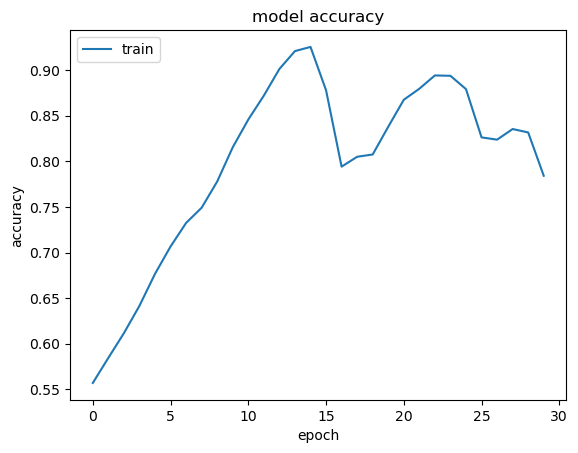

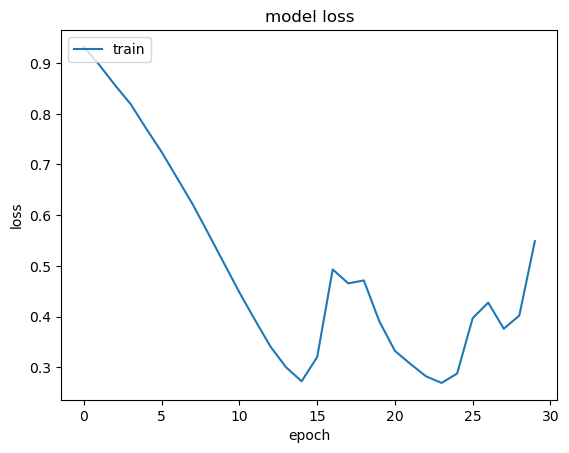

In [6]:
# visualize training
import matplotlib.pyplot as plt

def plot_training(history):
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
    
plot_training(model.history)
